<a href="https://colab.research.google.com/github/vinayshanbhag/covid19/blob/master/covid_19_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Load Data: Source https://covid.ourworldindata.org/data/ecdc/full_data.csv {display-mode: "form"}
# This code will be hidden when the notebook is loaded.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

owid_url = "https://covid.ourworldindata.org/data/ecdc/full_data.csv"
df_all = pd.read_csv(owid_url)
df_all["date"] = pd.to_datetime(df_all.date)
countries = ["United States","Italy","Spain","France","Germany","China"]

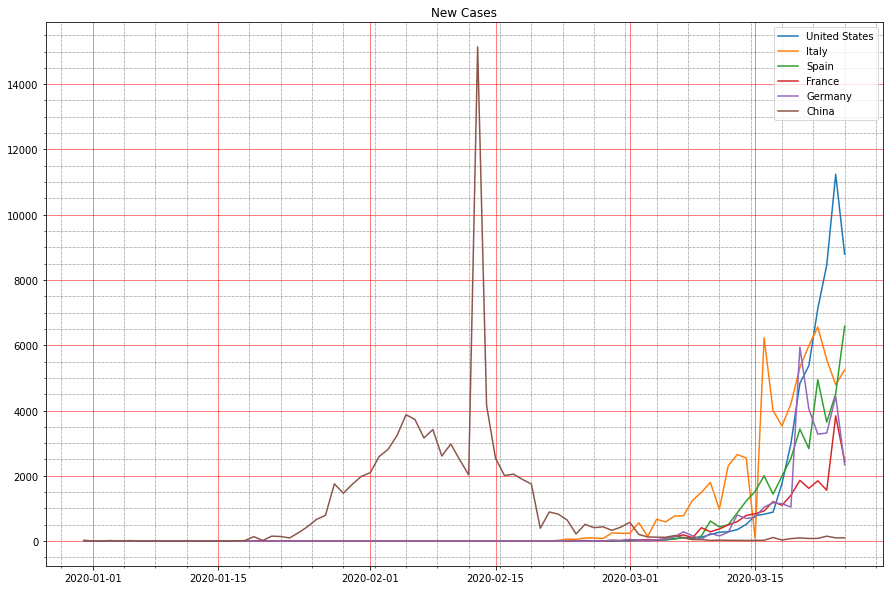

In [0]:
#@title New confirmed cases reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].new_cases)
plt.legend(countries) 
plt.title("New Cases");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

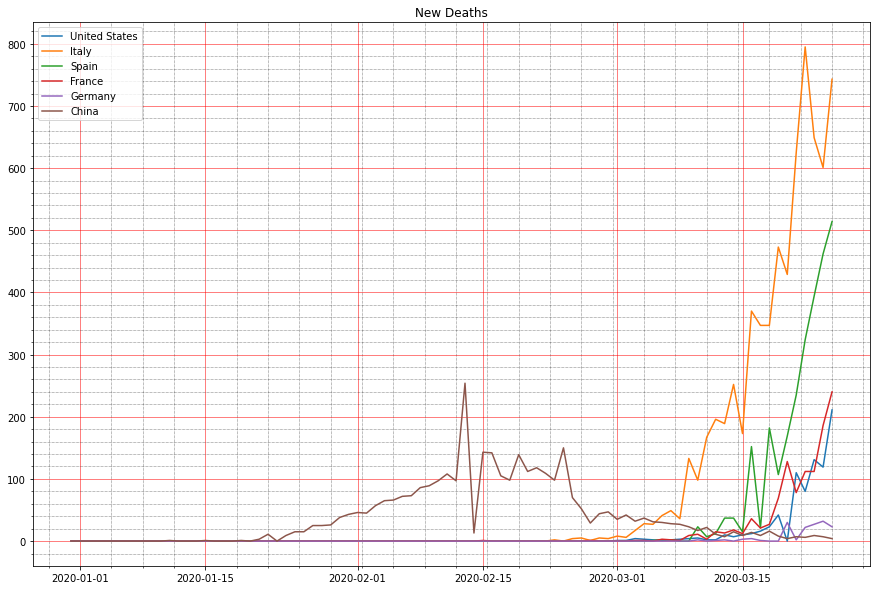

In [0]:
#@title Case fatalities reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date,df_all[df_all.location==country].new_deaths)
plt.legend(countries) 
plt.title("New Deaths");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

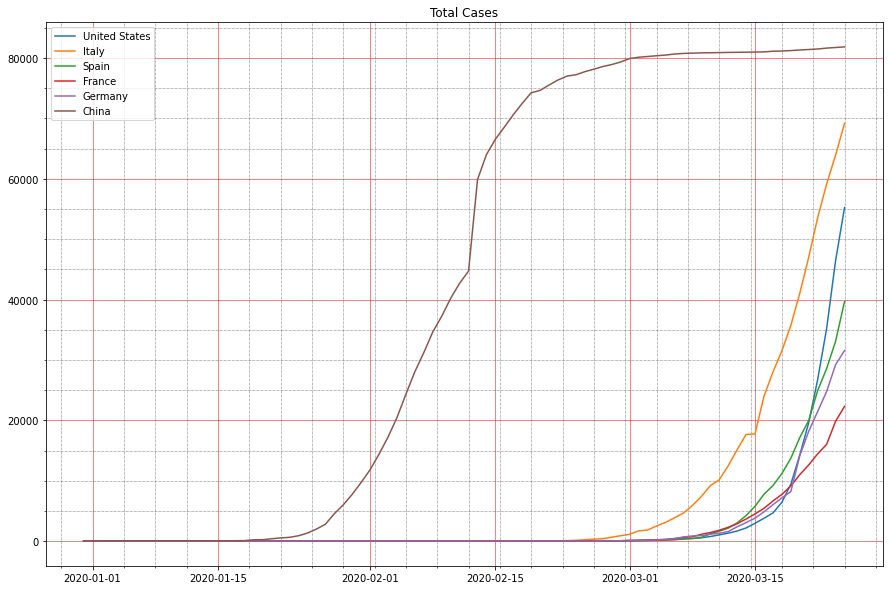

In [0]:
#@title Cumulative confirmed cases reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].total_cases)
plt.legend(countries) 
plt.title("Total Cases");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

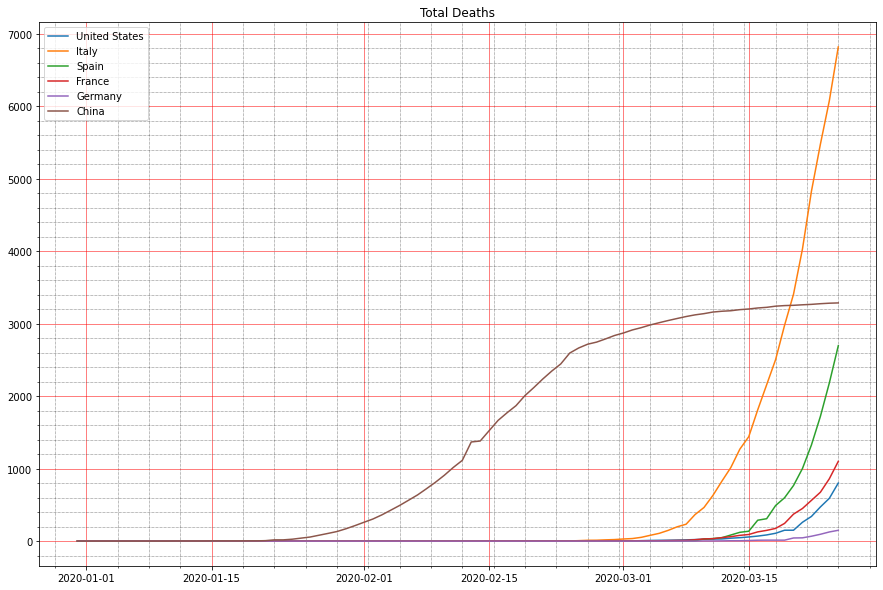

In [0]:
#@title Cumulative case fatalities reported daily {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
for country in countries:
  plt.plot(df_all[df_all.location==country].date.dt.date,df_all[df_all.location==country].total_deaths)
plt.legend(countries) 
plt.title("Total Deaths");
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

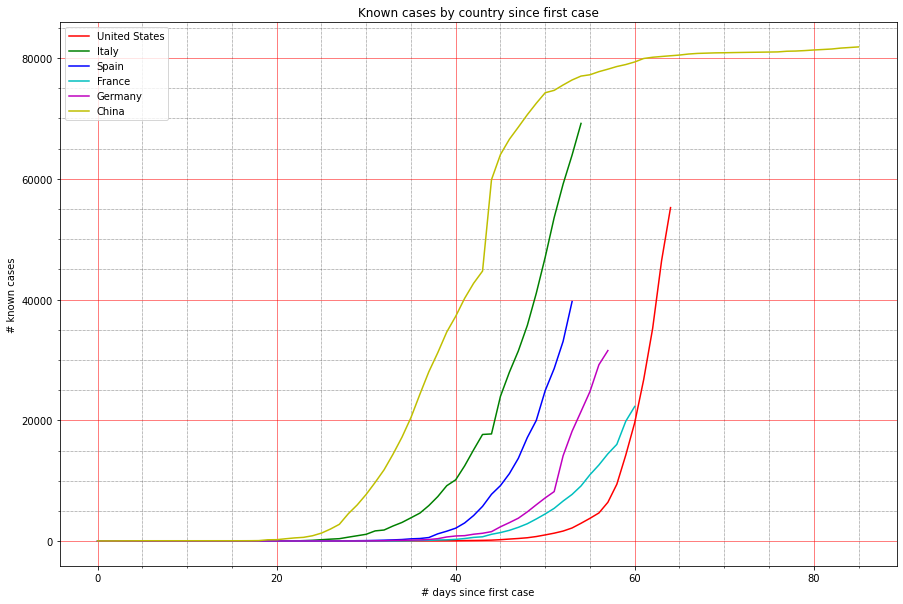

In [0]:
#@title Cumulative cases since first reported case {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
c = 'rgbcmyk'
p = ['-','.-','--','.','*-','o-','_-']
l = []
for i in p:
  for j in list(c):
    l.append(f'{j}{i}')
for idx, ctry in enumerate(countries):
  temp = df_all[df_all.location==ctry].copy()
  temp = temp[temp.total_cases>0].copy()
  plt.plot(
    range(len(temp)),
    temp.total_cases,
    l[idx]
  )
plt.legend(countries);
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('# days since first case')
plt.ylabel('# known cases')
plt.title('Known cases by country since first case');
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


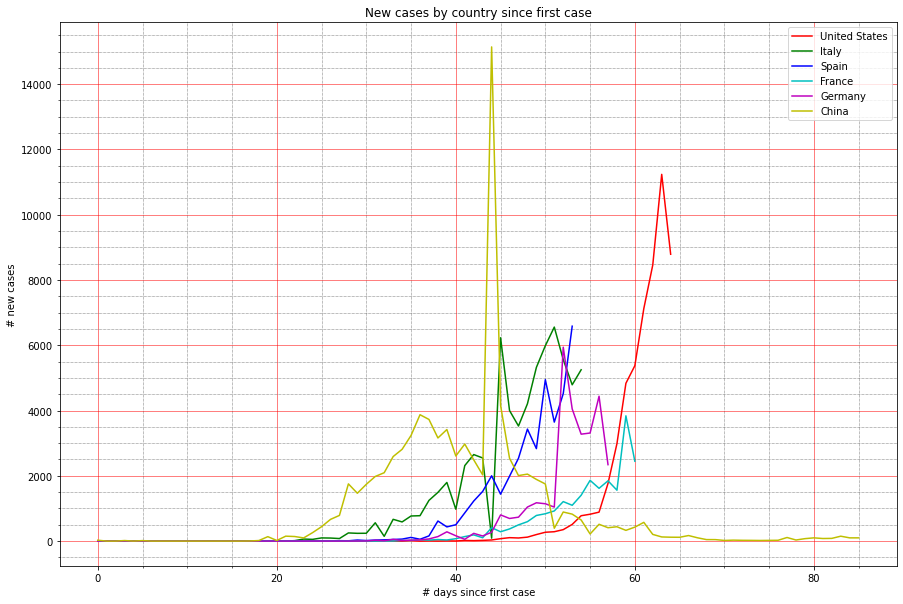

In [0]:
#@title New case trend since first reported case {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.figure(figsize=(15,10))
c = 'rgbcmyk'
p = ['-','.-','--','.','*-','o-','_-']
l = []
for i in p:
  for j in list(c):
    l.append(f'{j}{i}')
for idx, ctry in enumerate(countries):
  temp = df_all[df_all.location==ctry].copy()
  temp = temp[temp.total_cases>0].copy()
  plt.plot(
    range(len(temp)),
    temp.new_cases,
    l[idx]
  )
plt.legend(countries);
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('# days since first case')
plt.ylabel('# new cases')
plt.title('New cases by country since first case');
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

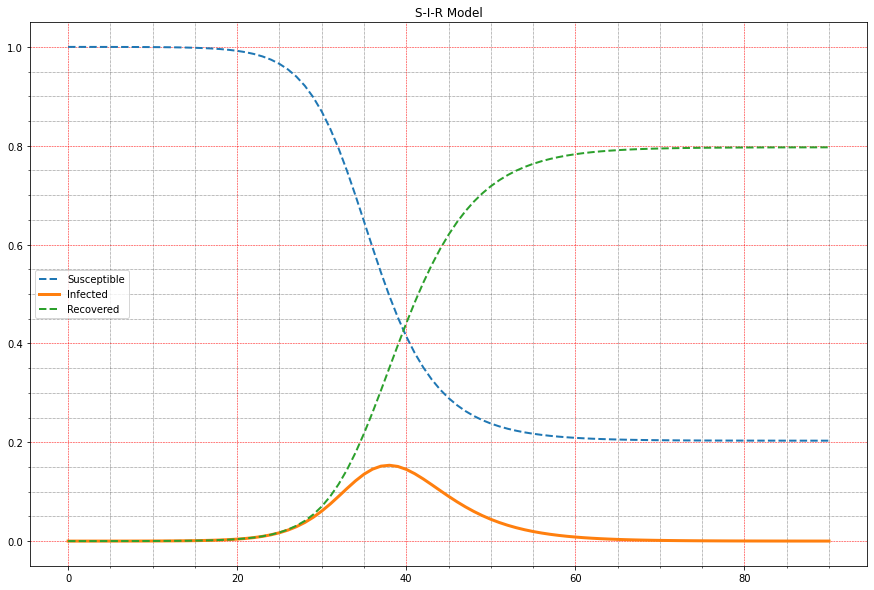

In [0]:
#@title SIR model {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

def eqs(val,t, beta, gamma):  
	Y=np.zeros((3)) 
	Y[0] = - beta * val[0] * val[1]
	Y[1] = beta * val[0] * val[1] - gamma * val[1]
	Y[2] = gamma * val[1]
	return Y

r_naught = 2.0
gamma = .3
beta = gamma*r_naught
step = 1
start = 0.0
end = 90.0
infected_0 = 1e-5
susceptible_0 = 1-infected_0
recovered_0 = 0.0
init_val = (susceptible_0, infected_0, recovered_0)

t_range = np.arange(start, end+step, step)
RES = odeint(eqs,init_val,t_range,(beta, gamma))

plt.figure(figsize=(15,10))
plt.plot(RES[:,0],linestyle='--',linewidth=2)
plt.plot(RES[:,1],linestyle='-',linewidth=3)
plt.plot(RES[:,2],linestyle='--',linewidth=2)
plt.legend(['Susceptible','Infected','Recovered'],loc='center left')
plt.title('S-I-R Model');
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')